# Machine Learning Beginner Project: Linear Regression
### Project Title: Predicting House Prices Using Linear Regression


**Objective:** To introduce students to supervised learning, focusing on linear regression, by guiding them through a project that predicts house prices based on a variety of features.


**Dataset:** We'll use the "Boston Housing Dataset" from the UCI Machine Learning Repository. This dataset contains information about housing in Boston, including features such as the number of rooms, age of the house, and crime rate, along with the target variable, which is the median value of owner-occupied homes.

In [61]:
# Import the  needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [19]:
# Load the dataset :
boston = pd.read_csv("/Users/bandanaadhikari/Desktop/classassignment/bandanaa/Python/machine-learning-linear-regression-ai-dreamers/data/boston_housing.csv")
boston.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [20]:
# get the features and target
X = boston.drop(columns='medv')#Features
y = boston['medv']#Target variable 

In [23]:
#Split my data into the train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
#train the model
model = LinearRegression() #Initialize the model
model.fit(X_train, y_train) #Train my model with dataset for training

LinearRegression()

In [25]:
#Prediction
y_pred = model.predict(X_test)


In [27]:
#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [30]:
#print the values into my mean square error 
print(f"Mean Squared Error: {mse}")
print(f"R^2 SScore: {r2}")


Mean Squared Error: 24.291119474974067
R^2 SScore: 0.6687594935356245


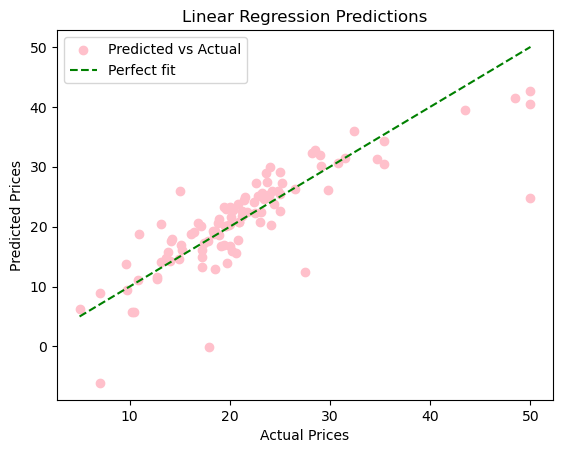

In [45]:
#PLot the prediction 
plt.scatter(y_test, y_pred, color='pink',label = "Predicted vs Actual")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression Predictions")
#Plot the slope line
plt.plot([y_test.min(), y_test.max()],[y_test.min(),y_test.max()], color = 'green', linestyle = '--',label ='Perfect fit')
plt.legend()
plt.show()



In [46]:
# Set up the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [50]:
# Initialize the Linear Regression model
lr = LinearRegression()

In [56]:
# Perform cross-validation
cv_scores = cross_val_score(lr, X_train, y_train, cv=5)

In [57]:
# Print cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

Cross-validation scores: [0.77501982 0.62424945 0.7594282  0.78766681 0.67581438]
Mean cross-validation score: 0.7244357342240264


In [58]:
# Calculate feature importances (coefficients)
feature_importances = lr.coef_
features = X.columns

In [68]:
# Create a DataFrame for visualization
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)


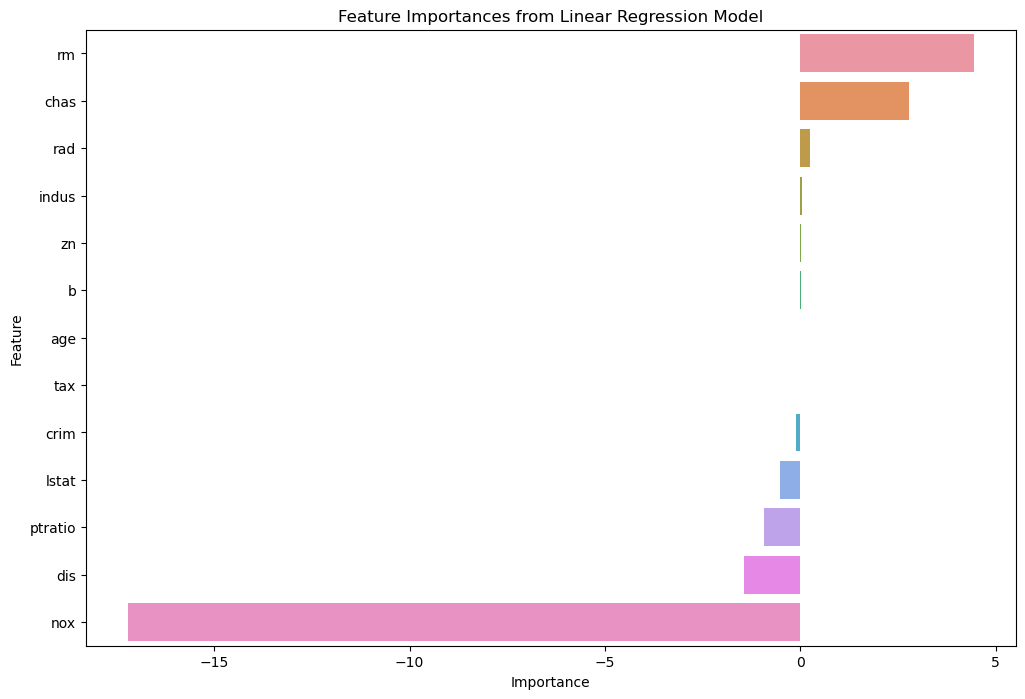

In [66]:
# Plot feature importances
#The coefficients of the Linear Regression model are used to determine feature importances and visualize them.
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df, x="Importance", y="Feature")
plt.title("Feature Importances from Linear Regression Model")
plt.show()

In [64]:
# Output the most important features
print(importance_df.head(10))

   Feature  Importance
5       rm    4.438835
3     chas    2.784438
8      rad    0.262430
2    indus    0.040381
1       zn    0.030110
11       b    0.012351
6      age   -0.006296
9      tax   -0.010647
0     crim   -0.113056
12   lstat   -0.508571
